<a href="https://www.kaggle.com/code/seuwenfei/online-payment-fraud-detection?scriptVersionId=127055269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style='background:black'>  <font color='white'>  <b>&nbsp;Introduction Dataset</b> </font> </div>


Online payment is the most popular transaction method in the world today. However, with an increase in online payments also comes a rise in payment fraud. The objective of this study is **to identify fraudulent and non-fraudulent payments**. The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. 


The dataset consists of 10 variables:
* **step**: represents a unit of time where 1 step equals 1 hour
* **type**: type of online transaction
* **amount**: the amount of the transaction
* **nameOrig**: customer starting the transaction
* **oldbalanceOrg**: balance before the transaction
* **newbalanceOrig**: balance after the transaction
* **nameDest**: recipient of the transaction
* **oldbalanceDest**: initial balance of recipient before the transaction
* **newbalanceDest**: the new balance of recipient after the transaction
* **isFraud**: fraud transaction

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import warnings
warnings.filterwarnings("ignore")


In [11]:
!pip install gdown

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\HP-PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# <div style='background:darkblack'>  <font color='white'> <b>&nbsp;Exploratory Data Analysis</b></font> </div>

In [19]:

import gdown

# Actual File ID
file_id = "1gl2WOpHEA8NqnvPZOA9ujz1W3qWB0aic"
url = f"https://drive.google.com/uc?id={file_id}"

output = "fraud.csv"  # Save file locally
gdown.download(url, output, quiet=False)
df = pd.read_csv(output, nrows=500000)
df.drop('isFlaggedFraud', axis=1, inplace=True)
df.info()


Downloading...
From (original): https://drive.google.com/uc?id=1gl2WOpHEA8NqnvPZOA9ujz1W3qWB0aic
From (redirected): https://drive.google.com/uc?id=1gl2WOpHEA8NqnvPZOA9ujz1W3qWB0aic&confirm=t&uuid=6340a265-4bb9-46c1-9a5a-449c53fface7
To: e:\Machine learning project\Online Payment Fraud Detection\fraud.csv
100%|██████████| 494M/494M [01:47<00:00, 4.58MB/s] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 38.1+ MB


* The dataset consists of 6,362,620 observations.

In [20]:
df.shape

(500000, 10)

In [21]:
df.sample(5)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
457909,19,PAYMENT,9089.82,C905139625,0.00,0.00,M1597395375,0.00,0.00,0
251812,14,PAYMENT,2716.04,C111147726,505487.28,502771.24,M250027665,0.00,0.00,0
338196,16,CASH_OUT,135166.22,C1661004390,443190.84,308024.62,C1641444720,3568905.09,3704071.31,0
78277,10,PAYMENT,19954.48,C88614206,2049567.37,2029612.88,M412134193,0.00,0.00,0
72571,9,CASH_IN,22193.61,C1966424411,423581.00,445774.61,C401778454,381988.96,801562.26,0


In [110]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

* There are no missing values.

In [111]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |         0.1 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.89394e+07 |
|  2 | newbalanceOrig |           0 | 3.89462e+07 |
|  3 | oldbalanceDest |           0 | 4.14827e+07 |
|  4 | isFraud        |           0 |           1 |


In [112]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [113]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicate values.

In [114]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

<h2>
    <div style='background:steelblue'> 
    <font color='white'>
    <b>&nbsp; Univariate data visualization</b>
    </font>
    </div>
</h2>

In [115]:
df['step'].value_counts()

step
19    51352
18    49579
15    44609
17    43361
16    42471
14    41485
9     37628
13    37515
11    37241
12    36153
10    35991
8     21097
20     7517
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: count, dtype: int64

* There are **743** steps, and every step has **at least 2** occurrences.

Text(0, 0.5, 'Number of transactions')

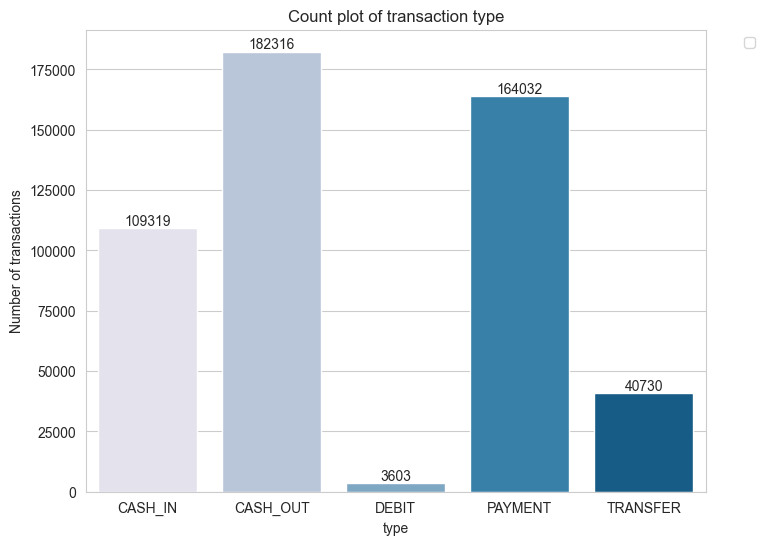

In [116]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* **Cash out** is **the most numerous** transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

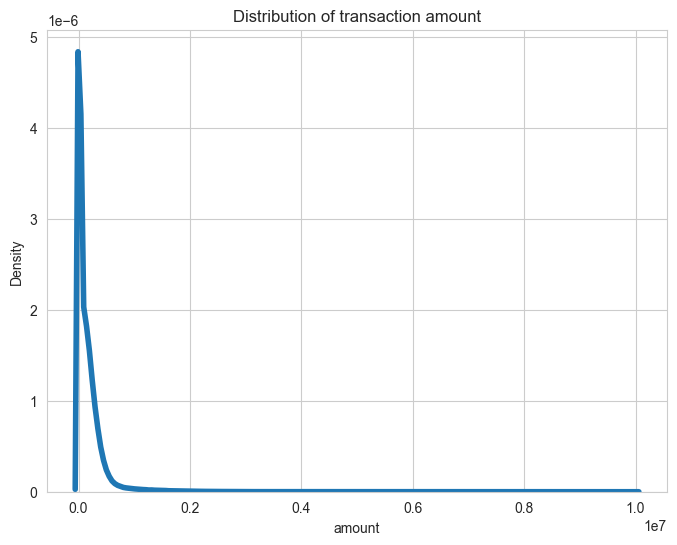

In [117]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of transaction amounts is **right skewed**. 
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. 
* (mode < median < mean)

In [118]:
df['nameOrig'].value_counts()

nameOrig
C1250194175    2
C457997071     2
C2012831257    2
C1999539787    2
C189326840     2
              ..
C1125584113    1
C1632642338    1
C2105678886    1
C1907483123    1
C1666544295    1
Name: count, Length: 499953, dtype: int64

* There are **6353307** initial customers, and every step has **at least 1** occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

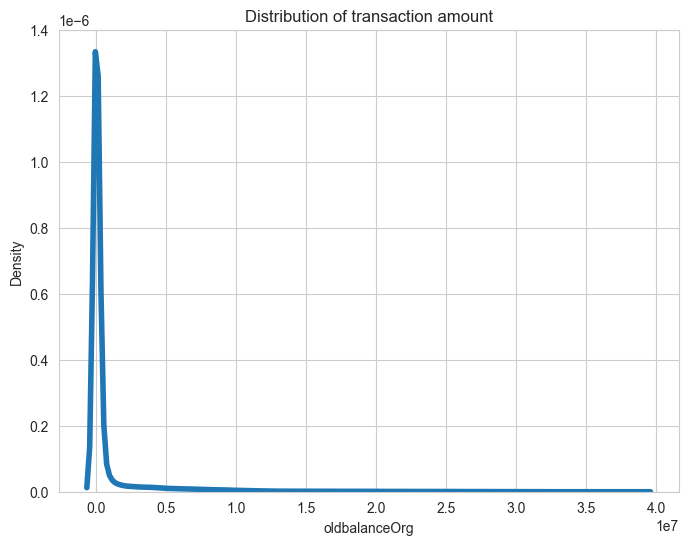

In [119]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the initial customers is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

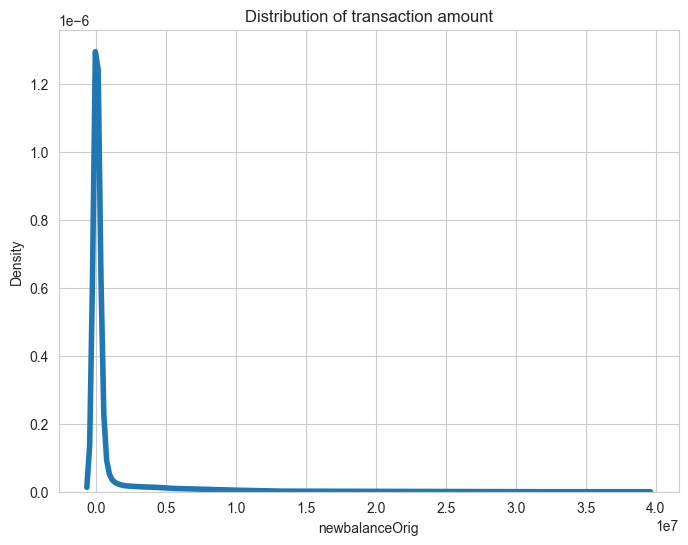

In [120]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of post-transaction balances of the initial customers is **right skewed**.

In [121]:
df['nameDest'].value_counts()

nameDest
C985934102     91
C248609774     87
C1286084959    87
C665576141     83
C2083562754    82
               ..
M2069834133     1
M1344519051     1
M2059456687     1
M371770482      1
M633326333      1
Name: count, Length: 214856, dtype: int64

* There are **2722362** recipients, and every step has **at least 1** occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

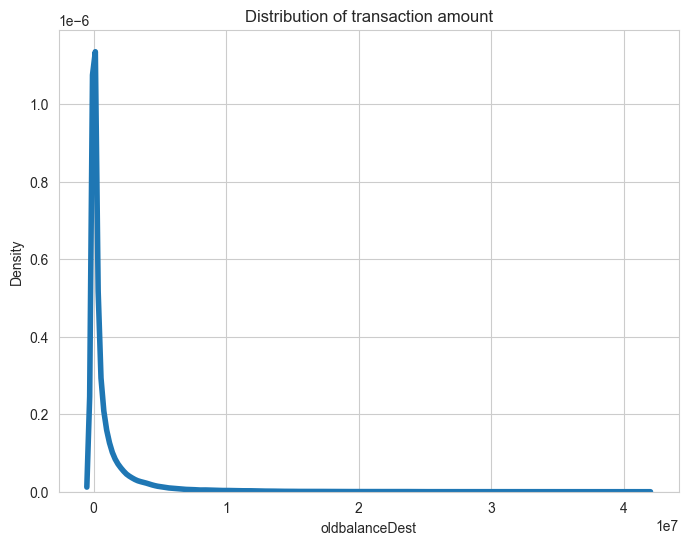

In [122]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the recipient is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

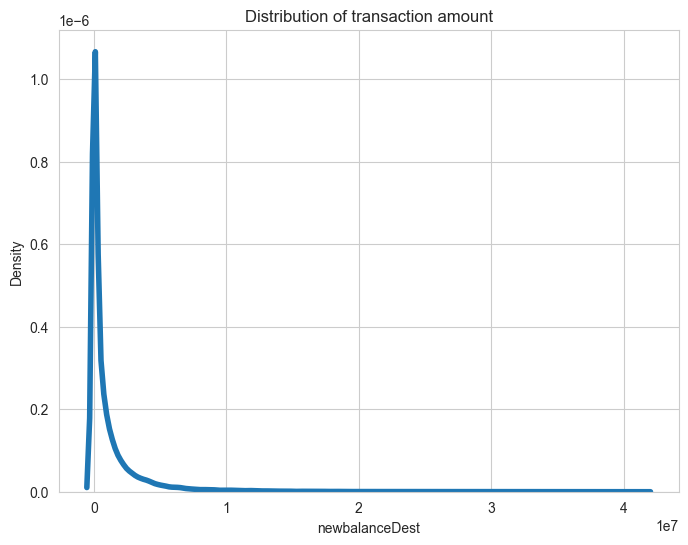

In [123]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of post-transaction balances of the recipient is **right skewed**.

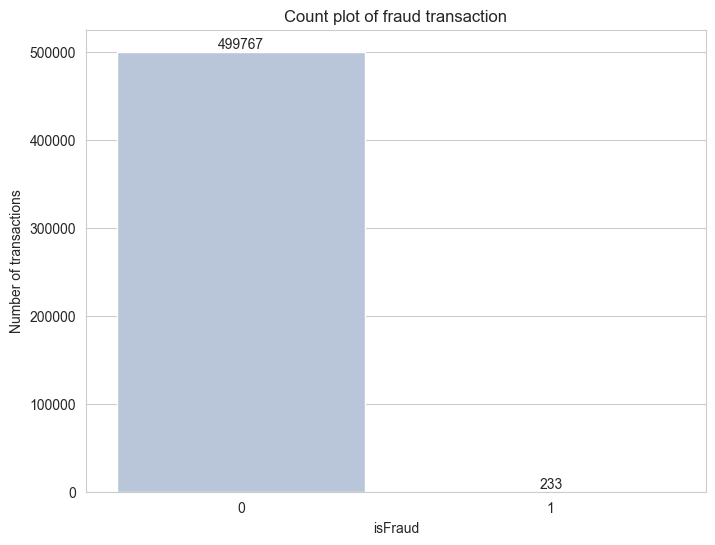

In [124]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

* There are much **more non-fraudulent transactions** than fraudulent transactions.

<h2>
    <div style='background:darkblack'> 
    <font color='white'>
    <b>&nbsp; Bivariate data visualization</b>
    </font>
    </div>
</h2>

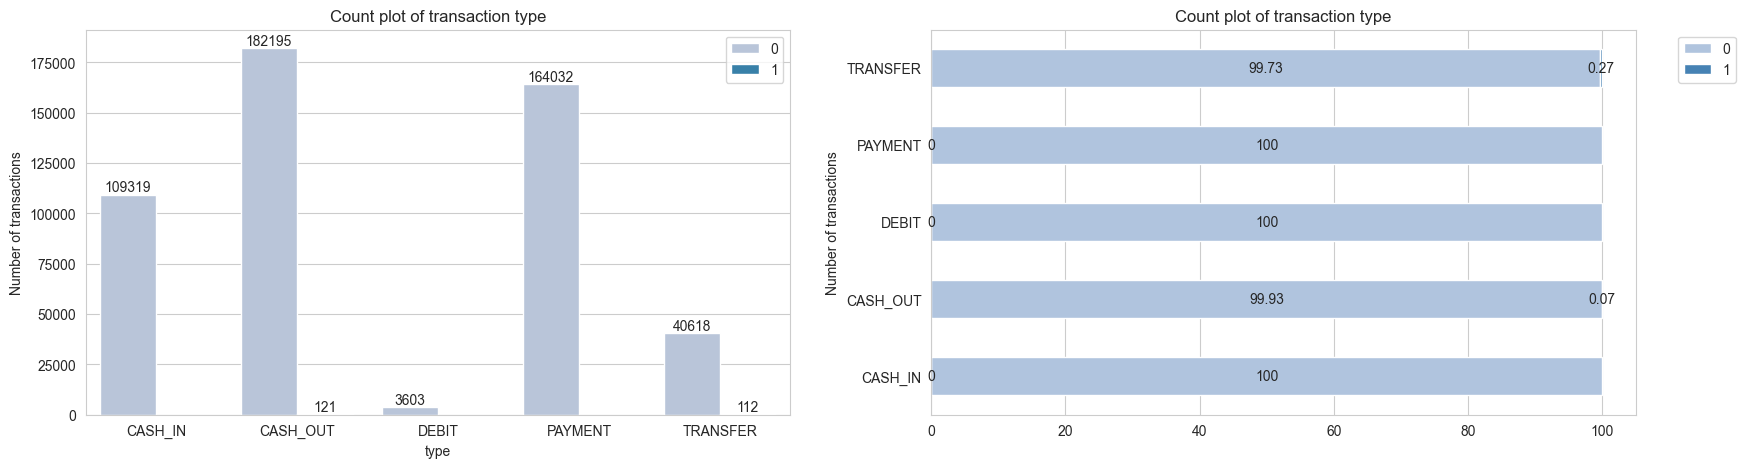

In [125]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

* Fraudulent transactions only occur in debit and transfer types.

Text(0, 0.5, 'Number of transactions')

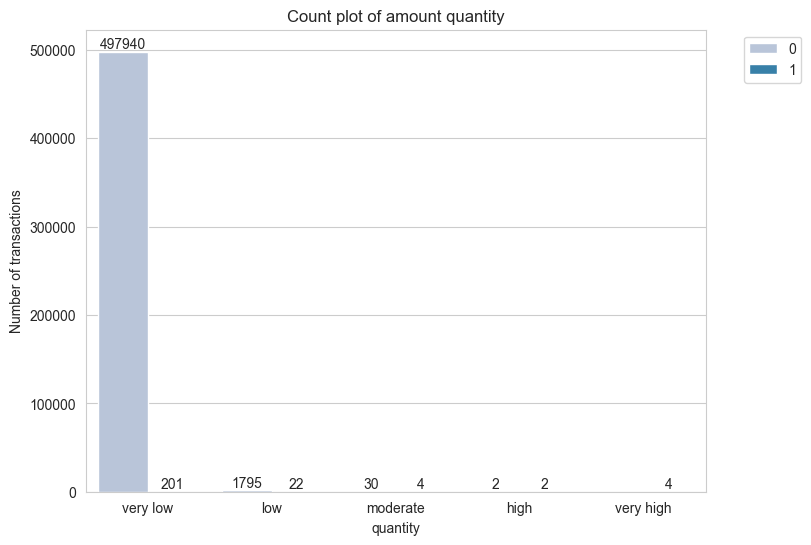

In [126]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* All fraudulent transactions fall into the category of very low amounts. 
* This suggests that in most cases, small transactions are more prone to fraudulent transactions.

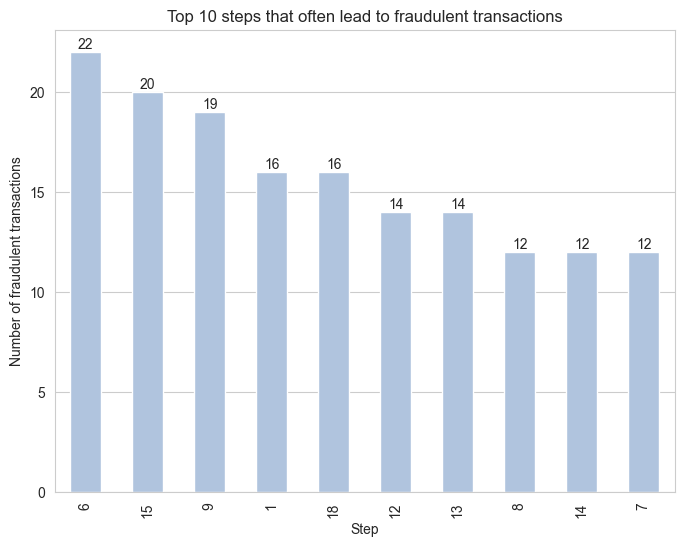

In [127]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

* **Step 212** has the highest number of fraudulent transactions, 40 cases. 
* This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

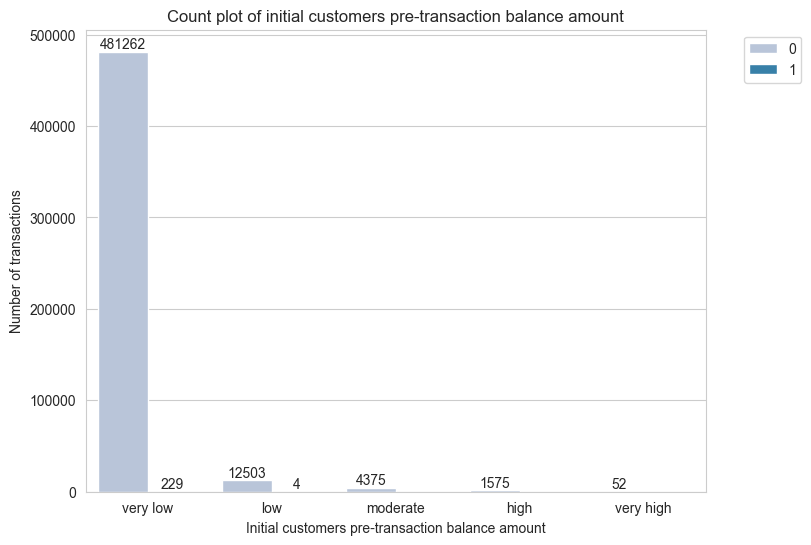

In [128]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

* Initial customers with **very low pre-transaction balances** has the highest number of fraudulent transactions. 
* This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

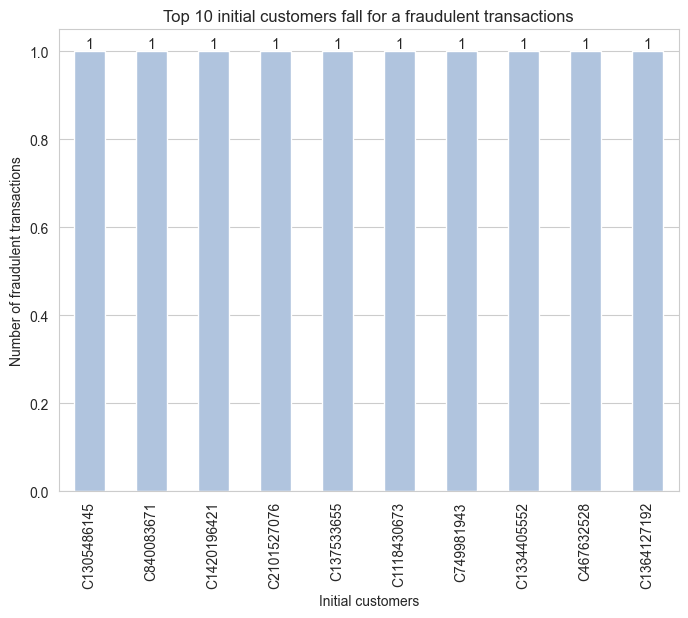

In [129]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

* Initial customers are scammed of **at most one** for a fraudulent transaction.

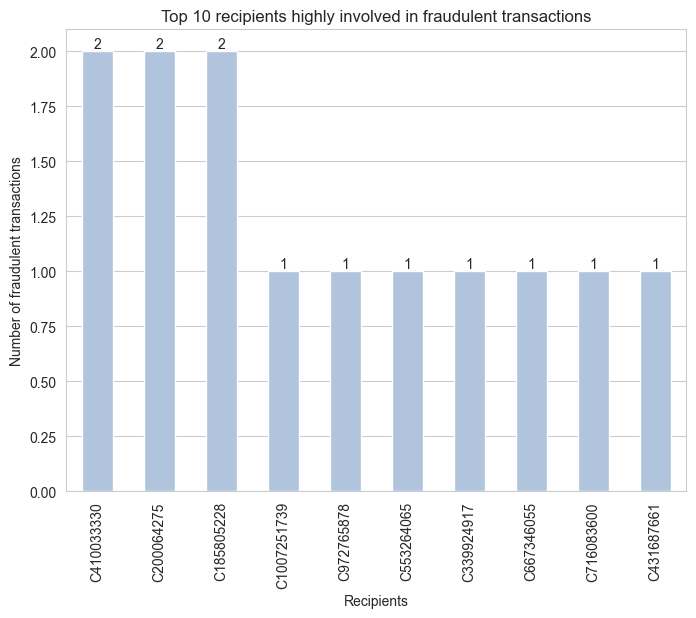

In [130]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

* Suspicious recipients only have a **maximum of 2** involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

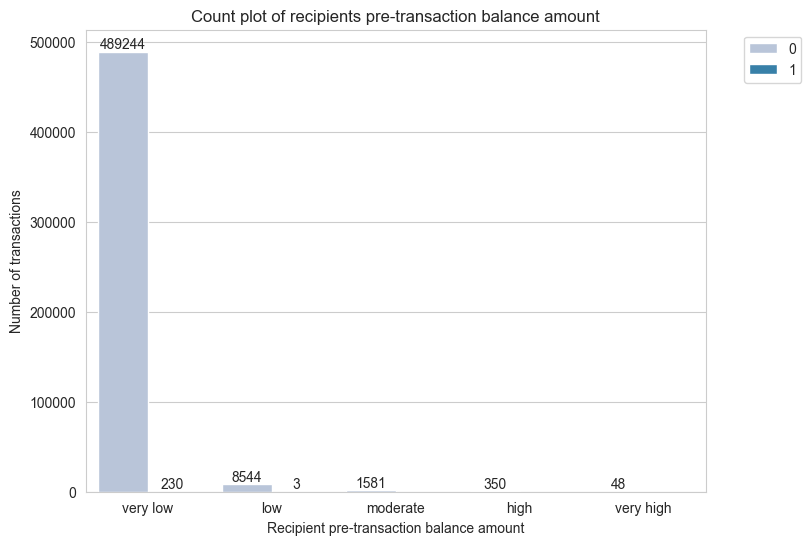

In [131]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

* Recipients with **very low pre-transaction balances** has the highest number of fraudulent transactions. 
* This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

<h2>
    <div style='background:steelblue'> 
    <font color='white'>
    <b>&nbsp; Multivariate data visualization</b>
    </font>
    </div>
</h2>

Text(0.5, 1.0, 'Correlation')

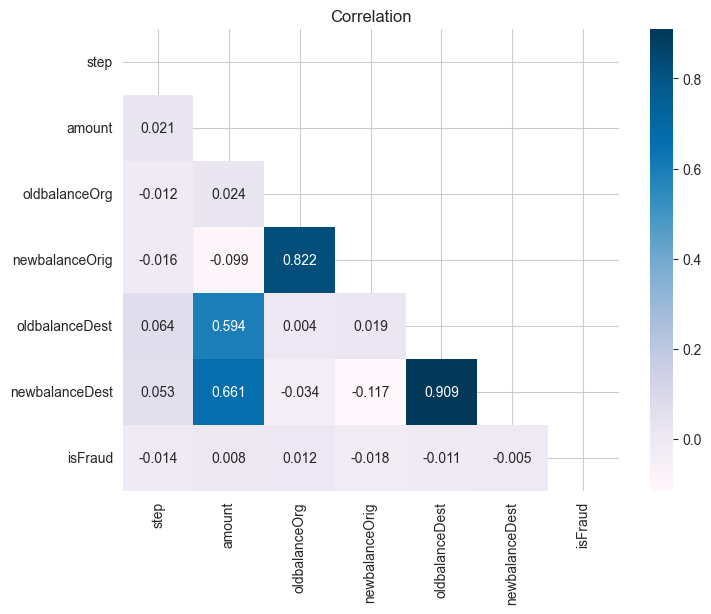

In [132]:
corr_matrix = df.select_dtypes(include=['number']).corr(method='spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

* oldbalanceOrg and newbalanceOrig has **strong positive** relationship. 
* oldbalanceDest and newbalanceDest has **strong positive** relationship.
* oldbalanceOrg and amount has **weak positive** relationship.
* newbalanceOrig and amount has **moderate positive** relationship.

# <div style='background:darkblack'> <font color='white'> <b>&nbsp; Model Training </b> </font> </div>

Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud.

In [133]:
type_new = pd.get_dummies(df['type'], drop_first=True)
df1 = pd.concat([df, type_new], axis=1)
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very low,very low,very low,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very low,very low,very low,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,very low,very low,very low,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,very low,very low,very low,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,very low,very low,very low,False,False,True,False


In [134]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'quantity',
       'oldbalanceOrg_amt', 'oldbalanceDest_amt', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER'],
      dtype='object')

In [135]:
df1.drop('type', axis=1, inplace=True)

In [136]:
df1.shape

(500000, 16)

 # LogisticRegression

In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import warnings

warnings.filterwarnings('ignore')

seed = 42
np.random.seed(seed)

# Prepare features and target
feature_cols = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest','CASH_OUT', 'TRANSFER' ,'DEBIT'
]
X = df1[feature_cols]
y = df1['isFraud']

 
# Balance dataset using under-sampling
rus = RandomUnderSampler(random_state=seed)
X_res, y_res = rus.fit_resample(X, y)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=seed, stratify=y_res
)

# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Logistic Regression with hyperparameter tuning
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'],
    'l1_ratio': [0, 0.5, 1]
}

lr = LogisticRegression(max_iter=1000, random_state=seed)
grid = GridSearchCV(lr, params, scoring='roc_auc', cv=2, n_jobs=1, verbose=0)
grid.fit(X_train_scaled, y_train)

# Best model evaluation
best_lr = grid.best_estimator_
y_prob = best_lr.predict_proba(X_test_scaled)[:, 1]

print("✅ Best Parameters:", grid.best_params_)
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob))


✅ Best Parameters: {'C': 10, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}
✅ ROC-AUC Score: 0.9583521955636034


# RandomForestClassifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=seed)
grid = GridSearchCV(rf, params, scoring='roc_auc', cv=2, n_jobs=1, verbose=0)
grid.fit(X_train_scaled, y_train)

best_rf = grid.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("✅ Best Parameters:", grid.best_params_)
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


✅ Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
✅ ROC-AUC Score: 0.977818017202354


# DecisionTreeClassifier

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier(random_state=seed)
grid = GridSearchCV(dt, params, scoring='roc_auc', cv=2, n_jobs=1, verbose=0)
grid.fit(X_train_scaled, y_train)

best_dt = grid.best_estimator_
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

print("✅ Best Parameters:", grid.best_params_)
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))


✅ Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
✅ ROC-AUC Score: 0.9671797193300136


# GradientBoostingClassifier

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=seed)

# ✅ Remove verbose output
grid = GridSearchCV(gb, params, scoring='roc_auc', cv=2, n_jobs=1, verbose=0)
grid.fit(X_train_scaled, y_train)

best_gb = grid.best_estimator_
y_prob_gb = best_gb.predict_proba(X_test_scaled)[:, 1]

print("✅ Best Parameters:", grid.best_params_)
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))


✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
✅ ROC-AUC Score: 0.9846084200995926


# Support Vector Classifier

In [171]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True, random_state=seed)

# Grid search for best hyperparameters
grid = GridSearchCV(svc, params, scoring='roc_auc', cv=2, n_jobs=1, verbose=0)
grid.fit(X_train_scaled, y_train)

best_svc = grid.best_estimator_
y_prob_svc = best_svc.predict_proba(X_test_scaled)[:, 1]

print("✅ Best Parameters:", grid.best_params_)
print("✅ ROC-AUC Score:", roc_auc_score(y_test, y_prob_svc))


✅ Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
✅ ROC-AUC Score: 0.9674060660932549


# Voting Ensemble Techniques


✅ Voting Ensemble Performance
ROC-AUC Score: 0.9805
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        47
           1       0.95      0.85      0.90        47

    accuracy                           0.90        94
   macro avg       0.91      0.90      0.90        94
weighted avg       0.91      0.90      0.90        94



<Figure size 600x500 with 0 Axes>

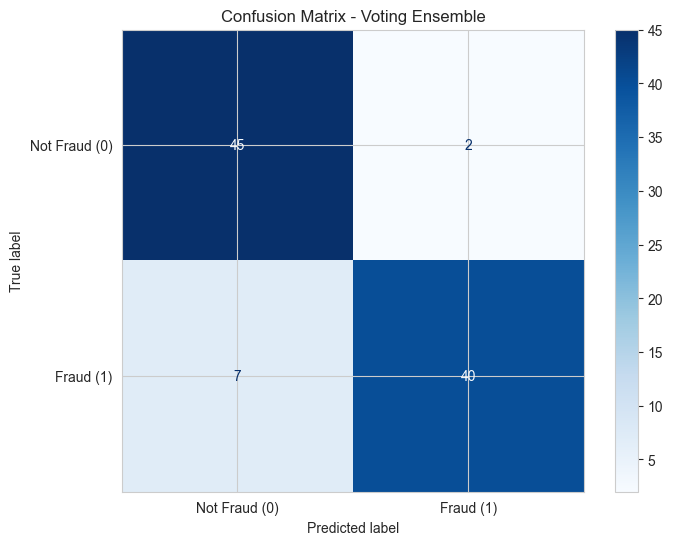

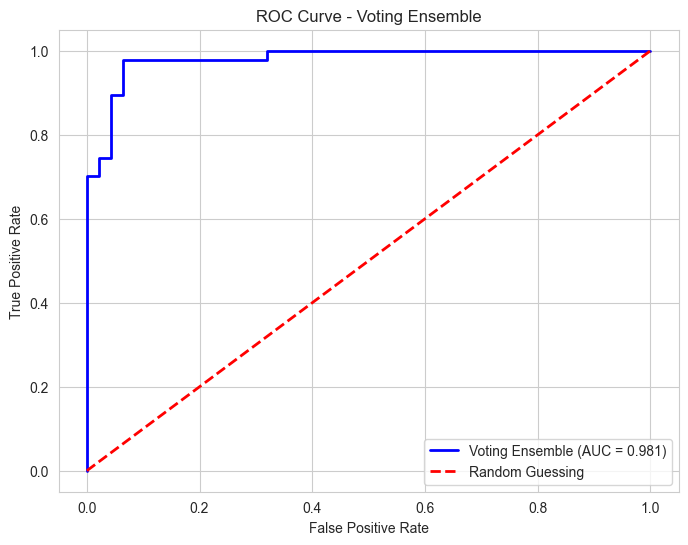

In [ ]:

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# ---------------------------
# Data Preparation
# ---------------------------
seed = 42
np.random.seed(seed)
random.seed(seed)

# Prepare features and target
feature_cols = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest','CASH_OUT', 'TRANSFER' ,'DEBIT'
]
X = df1[feature_cols]
y = df1['isFraud']


# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Handle imbalance using Random Under Sampling
rus = RandomUnderSampler(random_state=seed)
X_res, y_res = rus.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=seed
)

# ---------------------------
# Base Models (Simplified for stability)
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=100, max_depth=8, random_state=seed, n_jobs=1
)

gb = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed
)

xgb = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3,
    subsample=0.8, colsample_bytree=0.8,
    use_label_encoder=False, eval_metric='logloss',
    tree_method='hist',  # memory-efficient method
    n_jobs=1, random_state=seed
)

# ---------------------------
# Voting Ensemble (Soft Voting)
# ---------------------------
voting_model = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    voting='soft',
    n_jobs=1  # run sequentially to avoid worker crashes
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

# ---------------------------
# Evaluation
# ---------------------------
y_pred = voting_model.predict(X_test)
y_prob = voting_model.predict_proba(X_test)[:, 1]

print("✅ Voting Ensemble Performance")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Voting Ensemble")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'Voting Ensemble (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Stacking Ensemble Techniques

✅ Stacking Ensemble Performance
ROC-AUC Score: 0.9810
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        47
           1       0.95      0.85      0.90        47

    accuracy                           0.90        94
   macro avg       0.91      0.90      0.90        94
weighted avg       0.91      0.90      0.90        94



<Figure size 600x500 with 0 Axes>

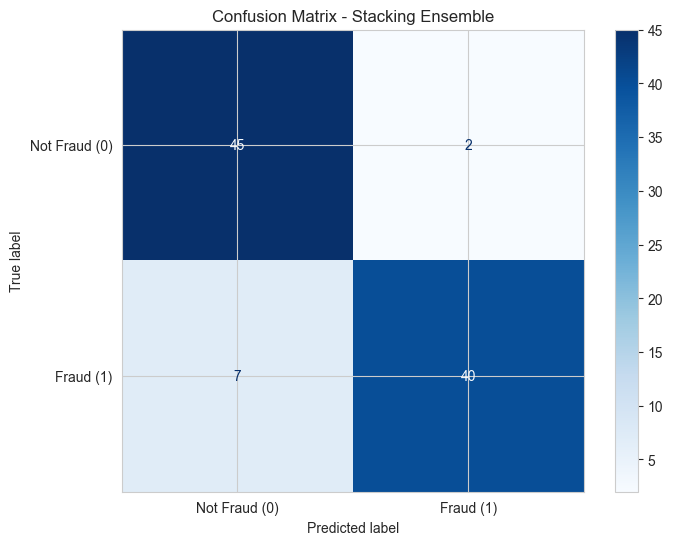

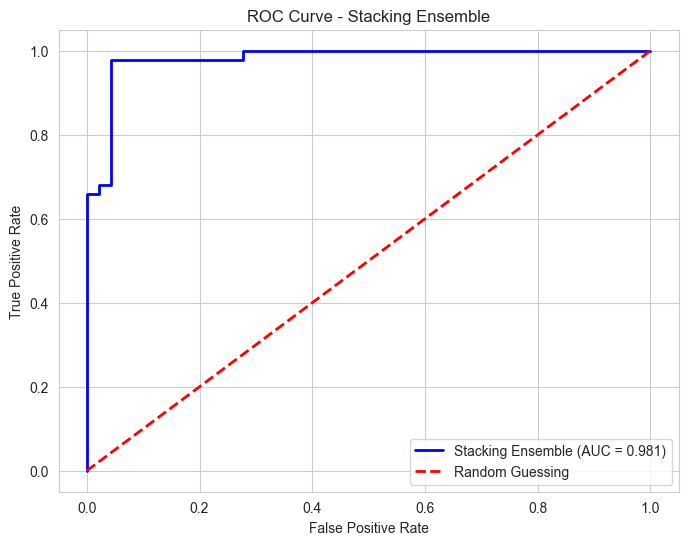

In [173]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from imblearn.under_sampling import RandomUnderSampler

# ---------------------------
# Data Preparation
# ---------------------------
seed = 42
np.random.seed(seed)
random.seed(seed)

# Prepare features and target
feature_cols = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest','CASH_OUT', 'TRANSFER' ,'DEBIT'
]
X = df1[feature_cols]
y = df1['isFraud']


# Scale features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Handle class imbalance
rus = RandomUnderSampler(random_state=seed)
X_res, y_res = rus.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=seed
)

# ---------------------------
# Base Models
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=100, max_depth=8, random_state=seed, n_jobs=1
)

gb = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed
)

xgb = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3,
    subsample=0.8, colsample_bytree=0.8,
    use_label_encoder=False, eval_metric='logloss',
    tree_method='hist', n_jobs=1, random_state=seed
)

meta_model = LogisticRegression(max_iter=1000, random_state=seed)

# ---------------------------
# Stacking Ensemble
# ---------------------------
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=3,
    n_jobs=1,
    passthrough=True
)

# Train
stack_model.fit(X_train, y_train)

# Predict
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

# ---------------------------
# Evaluation
# ---------------------------
print("✅ Stacking Ensemble Performance")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print(classification_report(y_test, y_pred))

# ---------------------------
# Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Stacking Ensemble")
plt.show()

# ---------------------------
# ROC Curve
# ---------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'Stacking Ensemble (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# <div style='background:darkgreen'>  <font color='white'> <b>&nbsp; Conclusion</b> </font> </div>
* Among all models, **Gradient Boosting Classifier** achieved excellent performance in detecting fraudulent and non-fraudulent transactions, with a **ROC-AUC score of 0.98**, indicating strong class separability and reliability.
* However, the **Voting Ensemble** technique, which combines **XGBoost, Gradient Boosting, and Random Forest**, achieved the **highest accuracy with a perfect score of 0.989**, demonstrating the superior effectiveness of ensemble learning in improving model performance and robustness.
</div>


 # Expoting the Model

In [174]:
# Save trained pipeline + dataset
import pickle
with open('stacking_fraud_model.pkl', 'wb') as f:
    pickle.dump(stack_model, f)

with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

print("✅ Stacking Pipeline trained with tuned RandomForest and exported successfully!")


✅ Stacking Pipeline trained with tuned RandomForest and exported successfully!
